In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt

import time

# 준비된 데이터들을 확인할 것 : 2가지 파일[train.csv, test.csv]

In [2]:
t1 = time.time()
mnist_train_data_path = "C:\\Users\\1-11\\scikit_learn_data\\01_MNIST_Kaggle_data\\train.csv"

train = np.genfromtxt(mnist_train_data_path, delimiter=",", skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print('Process Time : '+ str(t2-t1))
print(train)

Process Time : 21.34480929374695
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [3]:
t1 = time.time()
mnist_test_data_path = "C:\\Users\\1-11\\scikit_learn_data\\01_MNIST_Kaggle_data\\test.csv"

test = np.genfromtxt(mnist_test_data_path, delimiter=",", skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print('Process Time : '+ str(t2-t1))
print(test)

Process Time : 15.324694395065308
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
print(len(train))
print(len(test))


42000
28000


In [5]:
train_data = train[:,1:]
train_labels = train[:,0]

In [62]:
print(train_data)
print()
print(train_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[1 0 1 ... 7 6 9]


In [7]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
# Method 1) numpy의 unique이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [9]:
import seaborn as sns

In [10]:
print(train[0].shape)
print(np.sqrt(train[0].shape[0]))

(785,)
28.0178514522438


In [11]:
print(test[0].shape)
print(np.sqrt(test[0].shape[0]))

(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number :0')

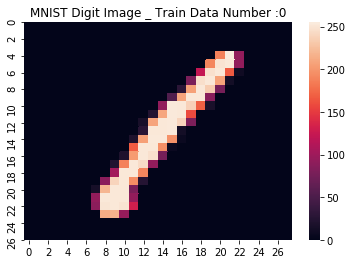

In [12]:
# 보고자 하는 데이터의 index
idx = 0
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
plt.title(str("MNIST Digit Image _ Train Data Number :")+str(idx))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [32]:
t1 = time.time()
# instantiate learning model( k = 3 )
# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다!! 
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

# fitting the model
knn.fit(train_data, train_labels)

# predict the response
pred = knn.predict(test)

t2 = time.time()
print("Process Time : " + str(t2-t1))

Process Time : 215.2002511024475


In [31]:
# 출력용 만들기
img_id = []
# submit 관련해서 id가 1부터 시작되어야 하니, index matching 부분임
for i in range(1, len(test)+1):
    img_id.append(i)
    
predMNIST = pd.DataFrame({"ImageId": img_id, "Label":pred})

# outpath
out_path = "C:\\Users\\1-11\\scikit_learn_data\\01_MNIST_Kaggle_data\\train_path2.csv"
predMNIST.to_csv(out_path, index = False)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train)
test_norm = min_max_scaler.fit_transform(test)

### with PCA - 주 성분 분석

In [16]:
from sklearn.decomposition import PCA

In [42]:
num_comp = 30
pca = PCA(n_components=num_comp)

In [43]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
# determine amount of variance explained by componenets
np.sum(pca.explained_variance_ratio_)

0.731855651189712

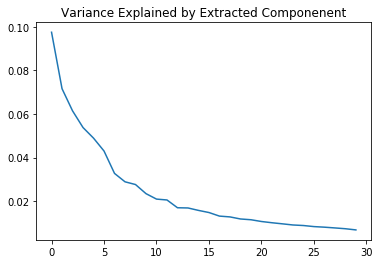

In [45]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

In [46]:
# extract the features
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(42000, 30)


In [47]:
# transform the test data using the exisiting parameters
test_ext = pca.transform(test)
print(test_ext.shape)

(28000, 30)


In [48]:
min_max_scaler = MinMaxScaler()

In [49]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
# from sklearn.model_selection import cross_validation
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [61]:
# 시간 오래 걸림...
cross_val_score(knn, train_norm, train_labels, cv=5)

array([0.97204045, 0.97096275, 0.96797238, 0.96927474, 0.97117675])

In [39]:
t1 = time.time()
# instantiate learning model( k = 3 )
# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다!! 
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

# fitting the model
knn.fit(train_norm, train_labels)

# predict the response
pred = knn.predict(test_norm)

t2 = time.time()
print("Process Time : " + str(t2-t1))

Process Time : 10.303324222564697


In [40]:
# 출력용 만들기
img_id = []
# submit 관련해서 id가 1부터 시작되어야 하니, index matching 부분임
for i in range(1, len(test_norm)+1):
    img_id.append(i)
    
predMNIST = pd.DataFrame({"ImageId": img_id, "Label":pred})

# outpath
out_path = "C:\\Users\\1-11\\scikit_learn_data\\01_MNIST_Kaggle_data\\train_path2.csv"
predMNIST.to_csv(out_path, index = False)